## 1D Convection Problem for PDE Solving using FTBS (Forward in Time and Backward in Space)

In [2]:
# 1D Convection Problem for PDE Solving
import numpy as np
import scipy as sp
from matplotlib import pyplot
%matplotlib inline

In [23]:
# Font Family and Size (Don't Usually Do This)
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 14

In [147]:
# Initial Conditions for Square Wave
nx = 41     #number of discrete spatial points
L = 2.0     #length of the 1D domain
dx = L / (nx - 1) # spatial grid size
nt = 25
dt = 0.02
c = 1.0   #convection speeds

# Define grid point coordinates
x = np.linspace(0.0, L, num=nx)

In [148]:
# Set initial conditions with 1.0 everywhere
u0 = np.ones(nx)
# Probe for list of indices where 0.5 <= x <= 1.0
mask = np.where(np.logical_and(x >= 0.5, x<= 1.0))
print(mask)

(array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]),)


In [149]:
# Set initial conditions of u = 2.0, where 0.5 <= x <= 1.0
u0[mask] = 2.0
print(u0)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [150]:
def plot_figure(x, u0, u):                      #u0 is the initial solution, u is current solution 
    pyplot.figure(figsize=(5.0,5.0))
    pyplot.xlabel('x-axis')
    pyplot.ylabel('u, solution value')
    pyplot.grid()
    pyplot.plot(x, u0, 'k--', label='Initial')
    pyplot.plot(x, u, 'b', label='Current')
    pyplot.xlim(0.0, L)
    pyplot.ylim(0.0, 2.5)
    pyplot.legend()

'\n\nColor Codes\n-----------\nC1 = orange\nC2 = green\nC3 = red\nC4 = purple\nC5 = brown\nC6 = pink\n\n'

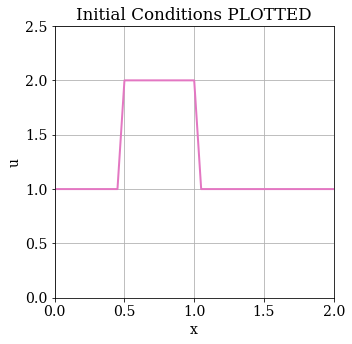

In [151]:
# Plot initial conditions
pyplot.figure(figsize=(5.0, 5.0))
pyplot.title('Initial Conditions PLOTTED')
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, color = 'C6', linestyle ='-', linewidth = 2)
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5)

"""

Color Codes
-----------
C1 = orange
C2 = green
C3 = red
C4 = purple
C5 = brown
C6 = pink

"""

In [152]:
u = u0.copy()
for n in range(1, nt):                # time loop
    un = u.copy()
    for q in range(1, nx):            # position loop nested in time loop
        u[q] = un[q] - c * dt / dx * (un[q] - un[q-1])

(0.0, 2.5)

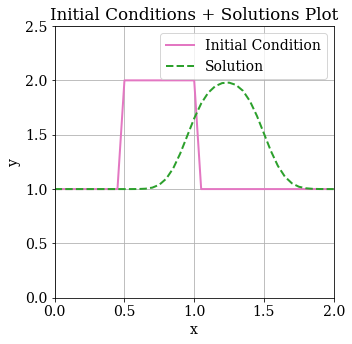

In [153]:
# Solution plotted after nt time steps
pyplot.figure(figsize=(5.0,5.0))
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.title('Initial Conditions + Solutions Plot')
pyplot.grid()
pyplot.plot(x,u0, label = 'Initial Condition', color = 'C6', linestyle = '-', linewidth = 2)
pyplot.plot(x,u, label = 'Solution', color = 'C2', linestyle = '--', linewidth = 2)
pyplot.legend()
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5)

In [154]:
# Note that the square wave is no longer square, and has been shifted to the right

# This occurs because the solution is a discretized version of the continuous
# differential equation we are solving. Shape is changed due to errors incurred
# during the solution

# Avoid errors by decreasing the time step, or increase the number of points to change the grid spacing

## Begin Non-Linear Convection Section

In [155]:
# Non-Linear Paramters
nx = 41
L = 2.0
dx = L / (nx - 1)
nt = 10
dt = 0.02

x = np.linspace(0.0, L, num=nx)
u0 = np.ones(nx)
mask = np.where((x>= 0.5) & (x <= 1.0))
u0[mask] = 2.0

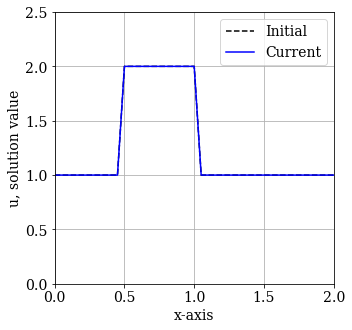

In [156]:
# Non-Linear Initial Conditions
plot_figure(x, u0, u0)

In [160]:
# For loop to include both spatial and time iterations
for n in range(1, nt):
    un = u.copy()
    for q in range(1, nx):
        u[q] = un[q] - un[q]*dt/dx*(un[q] - un[q-1])
"""
for n in range(1, nt):
    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])
    
Explanation:
------------
This for loop updates all elements of the array except for the first one. Utilizing
numpy slices
"""    


'\nfor n in range(1, nt):\n    u[1:] = u[1:] - dt / dx * u[1:] * (u[1:] - u[:-1])\n    \nExplanation:\n------------\nThis for loop updates all elements of the array except for the first one\n'

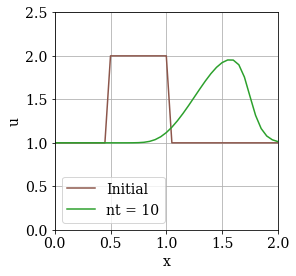

In [158]:
# Nonlinear Solution Plotting
pyplot.figure(figsize=(4.0,4.0))
pyplot.xlabel('x')
pyplot.ylabel('u')
pyplot.grid()
pyplot.plot(x, u0, label='Initial', color = 'C5')
pyplot.plot(x, u, label='nt = {}'.format(nt), color = 'C2')
pyplot.xlim(0.0, L)
pyplot.ylim(0.0, 2.5)
pyplot.legend()